In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_hrt = pd.read_csv('heart.csv')

In [3]:
df_hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_hrt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_hrt.shape

(303, 14)

In [6]:
df_hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print(df_hrt.age.value_counts())
print('\n\n' ,df_hrt.sex.value_counts())
print('\n\n' ,df_hrt.cp.value_counts())
print('\n\n' ,df_hrt.trestbps.value_counts())
print('\n\n' ,df_hrt.chol.value_counts())
print('\n\n' ,df_hrt.fbs.value_counts())
print('\n\n' ,df_hrt.restecg.value_counts())
print('\n\n' ,df_hrt.thalach.value_counts())
print('\n\n' ,df_hrt.exang.value_counts())
print('\n\n' ,df_hrt.oldpeak.value_counts())
print('\n\n' ,df_hrt.slope.value_counts())
print('\n\n' ,df_hrt.ca.value_counts())
print('\n\n' ,df_hrt.thal.value_counts())
print('\n\n' ,df_hrt.target.value_counts(),'\n\n')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64


 1    207
0     96
Name: sex, dtype: int64


 0    143
2     87
1     50
3     23
Name: cp, dtype: int64


 120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172     1
104     1
165     1
164     1
106     1
156     1
155     1
154     1
114     1
117     1
123     1
200     1
Name: t

In [8]:
df_hrt.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [9]:
X = df_hrt.drop("target", axis=1)

y = df_hrt.pop("target")

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size= 0.3, random_state=0)

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2


In [12]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [13]:
train_labels

137    1
106    1
284    0
44     1
139    1
      ..
251    0
192    0
117    1
47     1
172    0
Name: target, Length: 212, dtype: int64

In [14]:
test_labels

225    0
152    1
228    0
201    0
52     1
      ..
253    0
293    0
76     1
272    0
238    0
Name: target, Length: 91, dtype: int64

In [15]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (212, 13)
X_test (91, 13)
train_labels (212,)
test_labels (91,)


In [16]:
print('Total Obs',212+91)

Total Obs 303


In [17]:
dt_model =  DecisionTreeClassifier(criterion='gini')

In [18]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [19]:
from sklearn import tree

train_char_label = ['No', 'Yes']
hrt_Tree_File = open('hrt_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=hrt_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

hrt_Tree_File.close()

In [20]:
print(pd.DataFrame(dt_model.feature_importances_, columns= ['Imp'], index = X_train.columns).sort_values('Imp', ascending= False))

               Imp
cp        0.258870
oldpeak   0.131152
ca        0.124819
age       0.093349
thal      0.074463
thalach   0.063324
sex       0.054394
slope     0.048749
chol      0.041988
trestbps  0.036861
exang     0.030330
fbs       0.028669
restecg   0.013032


In [21]:
y_predict = dt_model.predict(X_test)

In [22]:
y_predict.shape

(91,)

In [23]:
reg_dt_model = DecisionTreeClassifier(criterion= 'gini', random_state=0, max_depth=7)
# reg_dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth=3, min_samples_leaf=20, min_samples_split=60)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [24]:
hrt_tree_regularized = open('hrt_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= hrt_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

hrt_tree_regularized.close()
dot_data

In [25]:
print(pd.DataFrame(reg_dt_model.feature_importances_, columns= ['Imp'], index = X_train.columns).sort_values('Imp', ascending= False))

               Imp
cp        0.268492
oldpeak   0.149242
ca        0.129459
thal      0.077231
chol      0.069979
sex       0.056416
age       0.056346
slope     0.050561
thalach   0.049158
fbs       0.029735
trestbps  0.028319
exang     0.021546
restecg   0.013516


In [26]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [27]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (212,)
ytest_predict (91,)


In [28]:
ytest_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [29]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [30]:
ytrain_predict_prob=reg_dt_model.predict_proba(X_train)
ytrain_predict_prob

array([[0.   , 1.   ],
       [0.375, 0.625],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0. 

In [31]:
# Model Evaluation

In [32]:
# AUC & ROC for training data

AUC: 0.999


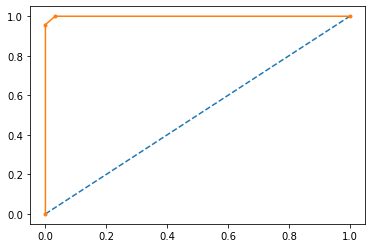

In [33]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [35]:
# AUC & ROC for test data

In [36]:
test_labels.shape

(91,)

In [37]:
probs.shape

(212,)

AUC: 0.758


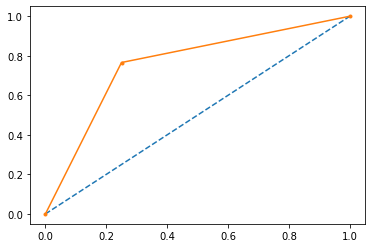

In [422]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [423]:
# Confusion Matrix for the training data

In [424]:
from sklearn.metrics import classification_report, confusion_matrix

In [425]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 91,   3],
       [  0, 118]], dtype=int64)

In [426]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels) 

0.9858490566037735

In [427]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        94
           1       0.98      1.00      0.99       118

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.99       212
weighted avg       0.99      0.99      0.99       212



In [428]:
# Confusion Matrix for test data

In [429]:
confusion_matrix(test_labels, ytest_predict)

array([[33, 11],
       [11, 36]], dtype=int64)

In [430]:
# Test Data Accuracy
reg_dt_model.score(X_test,test_labels)

0.7582417582417582

In [431]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

